# Netflix Machine Learning

### Import libraries and dataset

In [1]:
# import libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
data = pd.read_csv(r"C:\Users\Shinemet\Ironhack\Projects\Project7\Original_files\imdb_processed.csv")

In [3]:
data.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0


In [4]:
# dropping redundant first column
data.drop('Unnamed: 0', axis=1, inplace=True)

### Unstacking columns with multiple values

In [5]:
# loop to clean column names to unstack
col_to_clean = ['genre', 'country', 'language', 'cast', 'director', 'composer', 'writer']

for col in col_to_clean:
    data[col] = data[col].str.strip('[]')

In [6]:
# splitting each multiple values column into a maximum of 2 columns

In [7]:
genre = data.genre.str.split(',').apply(pd.Series)
genre.drop(genre.columns[2:], axis=1, inplace=True)
genre.rename(columns={0: 'genre1', 1: 'genre2'}, inplace=True)

In [8]:
country = data.country.str.split(',').apply(pd.Series)
country.drop(country.columns[2:], axis=1, inplace=True)
country.rename(columns={0: 'country1', 1: 'country2'}, inplace=True)

In [9]:
language = data.language.str.split(',').apply(pd.Series)
language.drop(language.columns[2:], axis=1, inplace=True)
language.rename(columns={0: 'language1', 1: 'language2'}, inplace=True)

In [10]:
cast = data.cast.str.split(',').apply(pd.Series)
cast.drop(cast.columns[2:], axis=1, inplace=True)
cast.rename(columns={0: 'cast1', 1: 'cast2'}, inplace=True)

In [11]:
director = data.director.str.split(',').apply(pd.Series)
director.drop(director.columns[2:], axis=1, inplace=True)
director.rename(columns={0: 'director1', 1: 'director2'}, inplace=True)

In [12]:
composer = data.composer.str.split(',').apply(pd.Series)
composer.drop(composer.columns[2:], axis=1, inplace=True)
composer.rename(columns={0: 'composer1', 1: 'composer2'}, inplace=True)

In [13]:
writer = data.writer.str.split(',').apply(pd.Series)
writer.drop(writer.columns[2:], axis=1, inplace=True)
writer.rename(columns={0: 'writer1', 1: 'writer2'}, inplace=True)

In [14]:
# join clean columns to my initial dataframe and clean
data = data.join([genre, country, language, cast, director, composer, writer])
data.drop(col_to_clean, axis=1, inplace=True)
data.head()

,title,year,kind,rating,vote,runtime,genre1,genre2,country1,country2,language1,language2,cast1,cast2,director1,director2,composer1,composer2,writer1,writer2
0,Dinosaur Planet,2003.0,tv mini series,7.7,474.0,50.0,'Documentary','Animation','United States',NaN,'English',NaN,'Christian Slater','Scott Sampson',NaN,NaN,NaN,NaN,'Mike Carrol','Mike Carroll'
1,Get Up and Dance!,1994.0,video movie,8.1,18.0,83.0,'Family',NaN,'United States',NaN,'English',NaN,'Paula Abdul','Aurorah Allain','Steve Purcell',NaN,NaN,NaN,NaN,NaN
2,8 Man,1992.0,movie,5.5,93.0,NaN,'Action','Sci-Fi','Japan',NaN,'Japanese',NaN,'Kai Shishido','Etsushi Takahashi','Yasuhiro Horiuchi',NaN,'Carole King',NaN,'Kazumasa Hirai','Jirô Kuwata'
3,What the #$*! Do We (K)now!?,2004.0,movie,5.3,13432.0,60.0,'Documentary','Comedy','United States',NaN,'English','German','Marlee Matlin','Elaine Hendrix','William Arntz','Betsy Chasse','Christopher Franke',NaN,'William Arntz','Betsy Chasse'
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,4.5,2177.0,96.0,'Comedy','Horror','United States',NaN,'English',NaN,'Brick Bronsky','Lisa Gaye','Eric Louzil',NaN,'Bob Mithoff',NaN,'Lloyd Kaufman','Carl Morano'


### Clean and replace missing values

In [15]:
# check missing values
data.isna().sum()

title           0
year            0
kind            0
rating        316
vote          316
runtime      1653
genre1         67
genre2       1952
country1      299
country2     6811
language1     399
language2    6731
cast1         171
cast2         487
director1    1311
director2    7692
composer1    2729
composer2    7433
writer1      1247
writer2      3338
dtype: int64

In [16]:
# drop all columns with over 2000 missing values
data.drop(['genre2', 'country2', 'language2', 'director2', 'composer1', 'composer2', 'writer2'], axis=1, inplace=True)

In [17]:
# calculate medians for each movie kind
median_values = data.groupby('kind')[['vote', 'runtime']].agg('median')

# impute missing values for vote, runtime columns with medians
kinds = ['episode', 'movie', 'tv mini series', 'tv movie', 'tv series', 'tv short', 'video game', 'video movie']
col_impute = ['vote', 'runtime']
for kind in kinds:
    for col in col_impute:
        for i in range(len(data)):
            if math.isnan(data[col][i])==True:
                if data['kind'][i] == kind:
                    data[col][i]= median_values.at[kind, col]

C:\Users\Shinemet\AppData\Local\Temp/ipykernel_13544/450816597.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i]= median_values.at[kind, col]


In [18]:
# drop missing values for target variable
data.dropna(subset=['rating'], inplace=True)

In [19]:
# replace all other missing values by 'unknown'
data.fillna('unknown',inplace=True)
data.isna().sum()

title        0
year         0
kind         0
rating       0
vote         0
runtime      0
genre1       0
country1     0
language1    0
cast1        0
cast2        0
director1    0
writer1      0
dtype: int64

In [20]:
# finish cleaning for final export
data = data.replace({"'":""}, regex=True)
data.head()

,title,year,kind,rating,vote,runtime,genre1,country1,language1,cast1,cast2,director1,writer1
0,Dinosaur Planet,2003.0,tv mini series,7.7,474.0,50.0,Documentary,United States,English,Christian Slater,Scott Sampson,unknown,Mike Carrol
1,Get Up and Dance!,1994.0,video movie,8.1,18.0,83.0,Family,United States,English,Paula Abdul,Aurorah Allain,Steve Purcell,unknown
2,8 Man,1992.0,movie,5.5,93.0,95.0,Action,Japan,Japanese,Kai Shishido,Etsushi Takahashi,Yasuhiro Horiuchi,Kazumasa Hirai
3,What the #$*! Do We (K)now!?,2004.0,movie,5.3,13432.0,60.0,Documentary,United States,English,Marlee Matlin,Elaine Hendrix,William Arntz,William Arntz
4,Class of Nuke Em High Part II: Subhumanoid Mel...,1991.0,movie,4.5,2177.0,96.0,Comedy,United States,English,Brick Bronsky,Lisa Gaye,Eric Louzil,Lloyd Kaufman


In [21]:
# export clean dataset before encoding
data.to_csv(r"C:\Users\Shinemet\Ironhack\Projects\Project7\data_clean.csv")

### Encode dataset and explore to finish cleaning

In [22]:
# drop columns irrevelant for encoded data analysis
data.drop('title', axis=1, inplace=True)

In [23]:
# loop to encode categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical = data.drop(['year', 'rating', 'vote', 'runtime'], axis=1)

for col in data:
    if col in categorical:
        data[col] = le.fit_transform(data[col])

In [24]:
# check encoding
data.head()

,year,kind,rating,vote,runtime,genre1,country1,language1,cast1,cast2,director1,writer1
0,2003.0,2,7.7,474.0,50.0,6,62,16,867,4968,4121,3319
1,1994.0,7,8.1,18.0,83.0,8,62,16,3627,438,3672,5036
2,1992.0,1,5.5,93.0,95.0,0,37,33,2513,1667,4077,2610
3,2004.0,1,5.3,13432.0,60.0,6,62,16,3047,1545,4022,4892
4,1991.0,1,4.5,2177.0,96.0,4,62,16,639,3350,1124,2893


In [25]:
# plot basic statistics
data.describe()

,year,kind,rating,vote,runtime,genre1,country1,language1,cast1,cast2,director1,writer1
count,8135.000000,8135.000000,8135.000000,8.135000e+03,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000
mean,1991.630731,2.264413,6.680000,1.873295e+04,99.083344,5.417824,50.575415,20.895267,2490.882237,3023.619299,2376.054825,2837.826921
std,14.888466,2.186876,1.281778,8.957999e+04,59.147249,4.612083,17.674861,11.860288,1441.975915,1728.332782,1313.432210,1604.431416
min,1914.000000,0.000000,1.500000,5.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,1.000000,6.000000,3.075000e+02,87.000000,2.000000,37.000000,16.000000,1223.500000,1521.000000,1229.000000,1448.500000
50%,1998.000000,1.000000,6.900000,1.531000e+03,95.000000,5.000000,62.000000,16.000000,2470.000000,3035.000000,2436.000000,2882.000000
75%,2002.000000,3.000000,7.600000,6.897500e+03,105.000000,7.000000,62.000000,16.000000,3764.000000,4541.500000,3606.500000,4335.000000
max,2005.000000,7.000000,9.600000,2.462087e+06,1620.000000,26.000000,67.000000,64.000000,4929.000000,5792.000000,4130.000000,5041.000000


In [26]:
data.columns

Index(['year', 'kind', 'rating', 'vote', 'runtime', 'genre1', 'country1',
       'language1', 'cast1', 'cast2', 'director1', 'writer1'],
      dtype='object')

<AxesSubplot:>

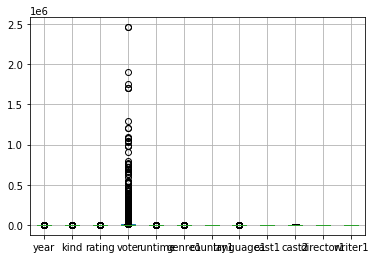

In [27]:
# check outliers with boxplot
data.boxplot()

In [28]:
# check and drop single outlier
data.vote.drop(data.vote.idxmax(), inplace=True)

<AxesSubplot:>

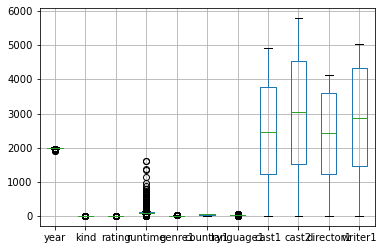

In [29]:
data.drop('vote', axis=1).boxplot()

<AxesSubplot:>

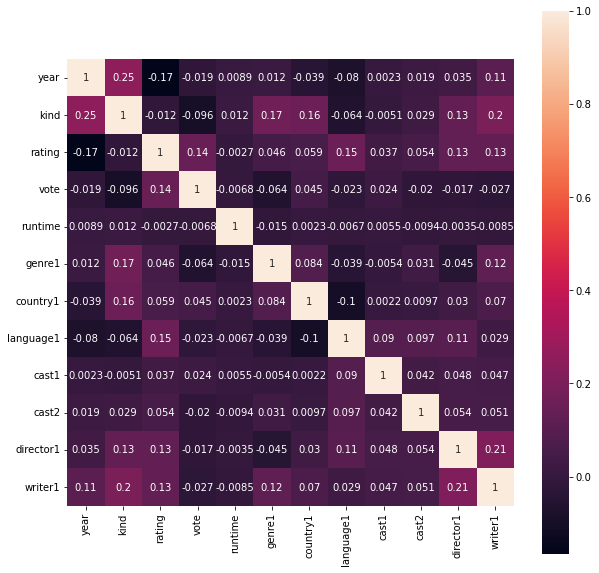

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), square=True, annot=True)

In [31]:
# export clean dataset to csv file
data.to_csv(r"C:\Users\Shinemet\Ironhack\Projects\Project7\data_clean_encoded.csv", index=False)